時系列データは時間の経過とともに観測されるデータのことです。期間$t=1,2,\cdots,T$で観測されるデータを$Y_1,Y_2\cdots,Y_T$、または{$Y_t$}$_{t=1}^{T}$と書きます。統計学ではこの観測値と確率変数を用いて、観測値の性質を調べていきます。観測値は確率変数の一部であるとしてモデル化できるかどうかを検討しながら、その特徴を捉えていきます。

観測値が得られるとその観測値の平均や分散を求めることができます。また、そのデータの異なる時点の共分散を求めることができ、それを自己共分散と呼びます。時点$t$におけるラグ、または時間差$h$の自己共分散を$h$次の自己共分散といいます。自己共分散を基準化したものが自己相関です。

確率変数の同時分布や基本統計量が時間の経過によって変化しないときその確率過程を定常過程といいます。多くの場合、期待値と共分散が時間の経過に対して定常であることを仮定して、弱定常性と呼びます。時系列データの平均が観測時点$t$に依存せず有限で、自己共分散も観測時点$t$に依存せずに時間差$h$のみに依存する場合、その系列は共分散定常時系列といいます。共分散定常仮定のうち、平均がゼロ、$h\ne 0$のすべての自己共分散がゼロであるものをホワイトノイズといいます。

同時分布が時間のどの時点においても同じであれば強定常といいます。

自己回帰移動平均モデルは

$$Y_{t}=\varepsilon _{t}+\sum _{i=1}^{p}\varphi _{i}Y_{t-i}+\sum _{i=1}^{q}\theta _{i}\varepsilon _{t-i}$$

と表せます。$\varphi$は自己回帰係数、$\theta$は移動平均係数です。


$$X_t = c + \sum_{i=1}^p \varphi_i Y_{t-i}+ \varepsilon_t$$

は自己回帰モデルでARモデルとも呼ばれます。

$$ X_{t}=\mu +\varepsilon _{t}+\theta _{1}\varepsilon _{t-1}+\cdots +\theta _{q}\varepsilon _{t-q}=
\mu +\sum _{i=1}^{q}\theta _{i}\varepsilon _{t-i}+\varepsilon _{t}$$

は移動平均モデルです。これらのモデルは

- Yule-Walker法
- 最尤法
- 最小二乗法
- PARCOR法

により、解かれます。

これらの方法はstatsmodelsではstatsmodels.tsa namespaceという形で提供されています。statsmodels.tsa内のモデルの構造は次のようになっています。

- ar_model : 単変量自己回帰過程、条件付き最尤法と厳密最尤法、条件付き最小二乗法による推計 [Statsmodelsによる自己回帰モデル入門](https://qiita.com/innovation1005/items/6c5263d79ccc67263b2c)
 
- arima.model : 一変量ARIMA過程、代替法による推定値

- statespace : 包括的な状態空間モデルの仕様と推定。

- vector_ar, var : ベクトル自己回帰過程（VAR）およびベクトル誤差補正モデル、推定、インパルス応答分析、予測誤差分散分解、およびデータ可視化ツール。

- arma_process : ARMA、MA、AR表現、Acf、Pacf、スペクトル密度、インパルス応答関数などの変換ツール。

- regime_switching : マルコフスイッチング動的回帰・自己回帰モデル


# statsmodels.tsa.arima.model
## sun spot data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
# Sunspots Data

print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



(            SUNACTIVITY
 1700-12-31          5.0
 1701-12-31         11.0
 1702-12-31         16.0
 1703-12-31         23.0
 1704-12-31         36.0
 ...                 ...
 2004-12-31         40.4
 2005-12-31         29.8
 2006-12-31         15.2
 2007-12-31          7.5
 2008-12-31          2.9
 
 [309 rows x 1 columns],
 309)

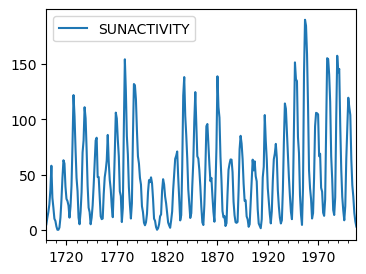

In [2]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta.plot(figsize=(4, 3))
dta,len(dta)

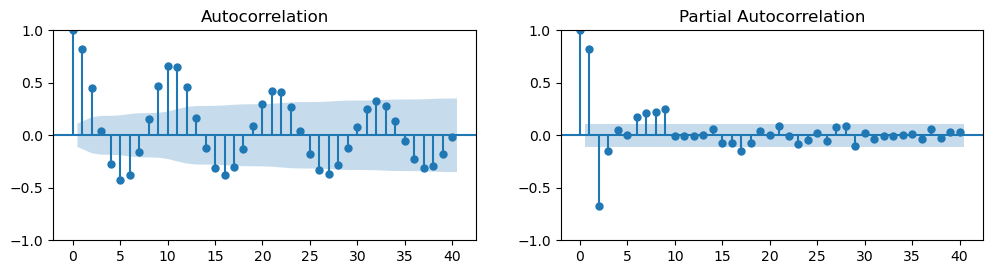

In [3]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, method='ywm',ax=ax2)

In [4]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print("arma_mod20.params----------------------")
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)
print("arma_mod30.params----------------------")
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

arma_mod20.params----------------------
const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64
2622.637093301154 2637.570458408745 2628.6074811464
arma_mod30.params----------------------
const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101139
dtype: float64
2619.4036292456594 2638.0703356301483 2626.866614052217


In [5]:
arma_mod30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1304.702
Date:                Wed, 21 Jun 2023   AIC                           2619.404
Time:                        08:50:46   BIC                           2638.070
Sample:                    12-31-1700   HQIC                          2626.867
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7519      3.518     14.141      0.000      42.856      56.648
ar.L1          1.3008      0.050     25.763      0.000       1.202       1.400
ar.L2         -0.5081      0.079     -6.421      0.000      -0.663      -0.353
ar.L3         -0.1296      0.058     -2.236      0.025      -0.243      -0.016
sigma2       270.1011     18.599     14.523      0.000     233.649     306.554
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               105.66
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.92
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564953611672045

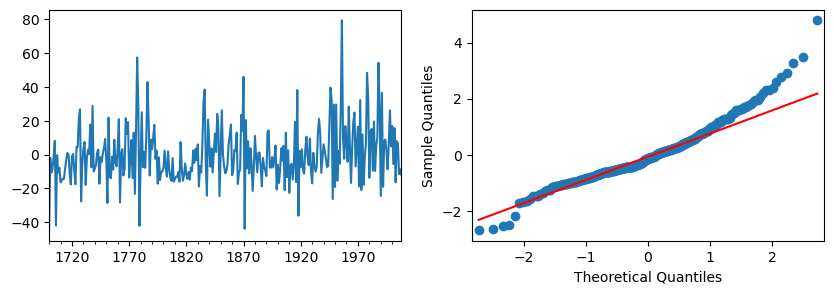

In [7]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(121)
ax = arma_mod30.resid.plot(ax=ax)
ax = fig.add_subplot(122)
fig = qqplot(arma_mod30.resid, line="q", ax=ax, fit=True)

In [8]:
resid = arma_mod30.resid
stats.normaltest(resid)

NormaltestResult(statistic=49.84393223944647, pvalue=1.5015079501182355e-11)

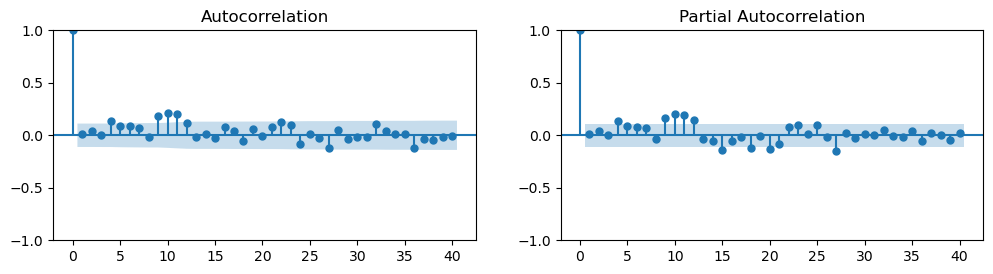

In [9]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, method='ywm', ax=ax2)

In [10]:
r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[np.arange(1, 25), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009170   0.026239  8.713184e-01
2.0   0.041793   0.572982  7.508939e-01
3.0  -0.001338   0.573544  9.024612e-01
4.0   0.136086   6.408642  1.706385e-01
5.0   0.092465   9.111351  1.047043e-01
6.0   0.091947  11.792661  6.675737e-02
7.0   0.068747  13.296552  6.520425e-02
8.0  -0.015022  13.368601  9.978086e-02
9.0   0.187590  24.641072  3.394963e-03
10.0  0.213715  39.320758  2.230588e-05
11.0  0.201079  52.359565  2.346490e-07
12.0  0.117180  56.802479  8.580351e-08
13.0 -0.014057  56.866630  1.895209e-07
14.0  0.015398  56.943864  4.000370e-07
15.0 -0.024969  57.147642  7.746546e-07
16.0  0.080916  59.295052  6.876728e-07
17.0  0.041138  59.852008  1.111674e-06
18.0 -0.052022  60.745723  1.549418e-06
19.0  0.062496  62.040010  1.832778e-06
20.0 -0.010303  62.075305  3.383285e-06
21.0  0.074453  63.924941  3.195540e-06
22.0  0.124954  69.152954  8.984238e-07
23.0  0.093162  72.069214  5.803579e-07


In [11]:
predict_sunspots = arma_mod30.predict("1990", "2012", dynamic=True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424877
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [12]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.634832987226247

# sm.tsa.statespace.

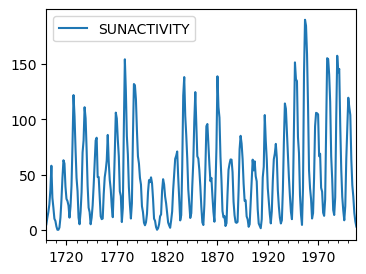

In [13]:
dta.plot(figsize=(4,3));

intercept     14.793947
ar.L1          1.390659
ar.L2         -0.688568
sigma2       274.761105
dtype: float64
2622.6363381415667 2637.5697032491576 2628.6067259868128


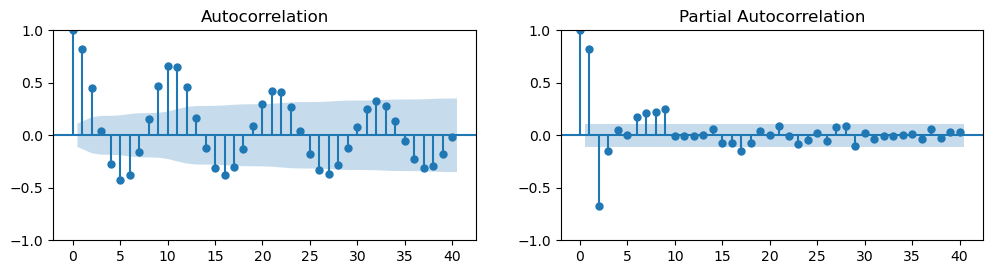

In [14]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40,method='ywm', ax=ax2)
arma_mod20 = sm.tsa.statespace.SARIMAX(dta, order=(2,0,0), trend='c').fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

intercept     14.793947
ar.L1          1.390659
ar.L2         -0.688568
sigma2       274.761105
dtype: float64
2622.6363381415667 2637.5697032491576 2628.6067259868128


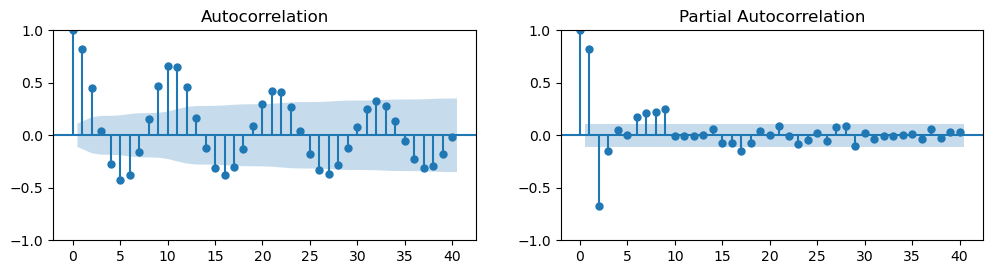

In [15]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40,method='ywm', ax=ax2)
arma_mod20 = sm.tsa.statespace.SARIMAX(dta, order=(2,0,0), trend='c').fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

In [16]:
arma_mod30 = sm.tsa.statespace.SARIMAX(dta.loc[:"1990"], order=(3,0,0), trend='c').fit(disp=False)
print(arma_mod30.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  291
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -1230.210
Date:                Wed, 21 Jun 2023   AIC                           2470.420
Time:                        08:50:47   BIC                           2488.787
Sample:                    12-31-1700   HQIC                          2477.778
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.4401      2.415      6.808      0.000      11.707      21.173
ar.L1          1.3237      0.052     25.235      0.000       1.221       1.426
ar.L2         -0.5618      0.084     -6.722      0.0

In [17]:
predict_sunspots = arma_mod30.predict("1950", "2012", dynamic=True)
fittedvalues_sunspot=arma_mod20.fittedvalues
print(predict_sunspots)

1950-12-31    103.562367
1951-12-31     64.719128
1952-12-31     30.949998
1953-12-31     11.072040
1954-12-31      7.473350
                 ...    
2008-12-31     49.140289
2009-12-31     49.140888
2010-12-31     49.145640
2011-12-31     49.152093
2012-12-31     49.157908
Freq: A-DEC, Name: predicted_mean, Length: 63, dtype: float64


In [18]:
sm.stats.durbin_watson(arma_mod30.resid)

Object `theory` not found.


1.9539694101623937

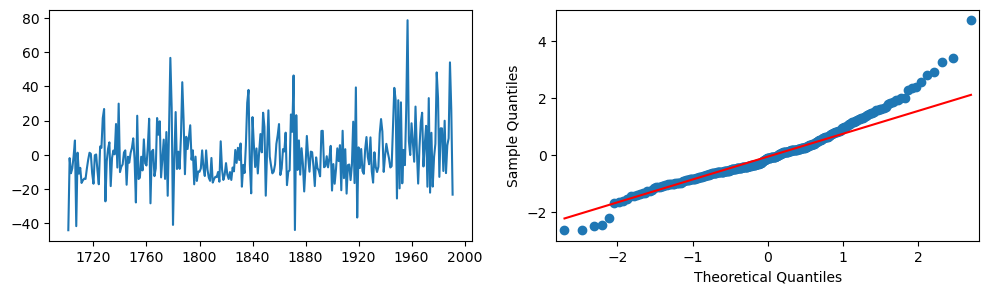

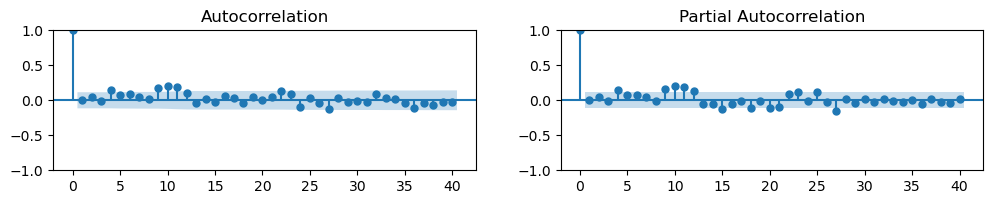

In [19]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(121)
ax = plt.plot(arma_mod30.resid)
resid = arma_mod30.resid
stats.normaltest(resid)
ax = fig.add_subplot(122)
fig = qqplot(resid, line='q', ax=ax, fit=True)
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40,method='ywm', ax=ax2)

In [20]:
r,q,p = sm.tsa.acf(resid, fft=True, qstat=True)
data = np.c_[r[1:], q, p]
index = pd.Index(range(1,q.shape[0]+1), name="lag")
table = pd.DataFrame(data, columns=["AC", "Q", "Prob(>Q)"], index=index)
print(table)

           AC          Q  Prob(>Q)
lag                               
1    0.007667   0.017283  0.895408
2    0.040930   0.511521  0.774327
3   -0.016436   0.591494  0.898377
4    0.142403   6.615956  0.157629
5    0.081077   8.575643  0.127235
6    0.090923  11.048847  0.086878
7    0.047154  11.716395  0.110280
8    0.012645  11.764570  0.162021
9    0.171908  20.699742  0.014052
10   0.210459  34.139394  0.000175
11   0.189275  45.048471  0.000005
12   0.109968  48.744073  0.000002
13  -0.034456  49.108199  0.000004
14   0.017967  49.207567  0.000008
15  -0.019683  49.327248  0.000016
16   0.059349  50.419315  0.000020
17   0.033545  50.769478  0.000032
18  -0.041382  51.304325  0.000048
19   0.052367  52.163953  0.000063
20  -0.002605  52.166088  0.000108
21   0.051993  53.019752  0.000137
22   0.130837  58.445597  0.000038
23   0.095687  61.358554  0.000024
24  -0.097672  64.404958  0.000015


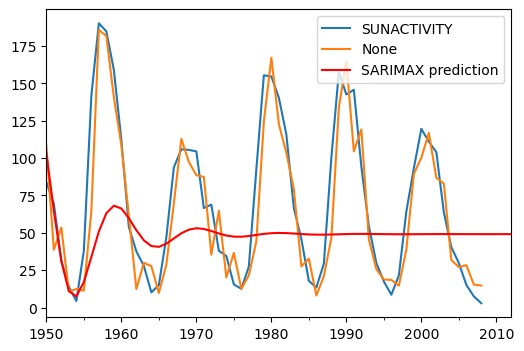

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
dta.loc['1950':].plot(ax=ax)
fittedvalues_sunspot.loc['1950':].plot(ax=ax)
predict_sunspots.plot(ax=ax, style='r',label='SARIMAX prediction')
ax.legend()

In [22]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

21.709860009859305

# statsmodels.tsa.arima_process.ArmaProcess

ARとMAの両成分には、ゼロラグに関する係数を含める必要があります。ほとんどすべての場合、これらの値は1であるべきです。さらに、ラグ・多項式表現を使用するため、ARパラメータはARMA表現で書くのと反対の符号を持つ必要があります。以下の例をご覧ください。

ARMA(p,q)過程は次のように記述されます。

で記述され、この関数で使用されるパラメータ化は、ラグ・多項式表現を使用しています、

例

ARMA(2,2)、AR係数は0.75と-0.25、MA係数は0.65と0.35。

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(12345)

ARMAプロセスからいくつかのデータを生成する：

In [24]:
arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])

arma_generate関数の規約では、ARとMAのパラメータのゼロラグに1を指定し、ARのパラメータは否定することが求められています。

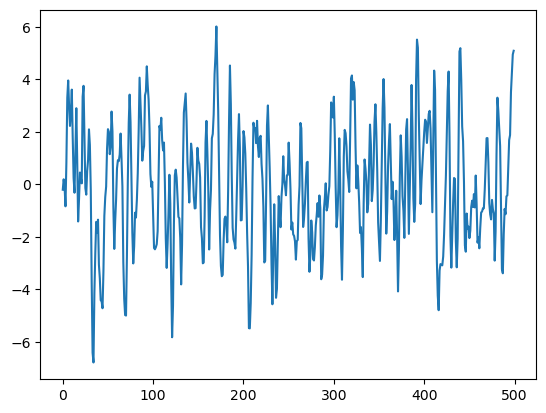

In [25]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 500
y = arma_generate_sample(arparams, maparams, nobs)
plt.plot(y)

さて、オプションで、日付情報を追加することができます。この例では、pandasの時系列を使用します。

In [26]:
dates = pd.date_range("1980-1-1", freq="M", periods=nobs)
y = pd.Series(y, index=dates)
arma_mod = ARIMA(y, order=(2, 0, 2), trend="n")
arma_res = arma_mod.fit()
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -716.874
Date:                Wed, 21 Jun 2023   AIC                           1443.747
Time:                        08:50:48   BIC                           1464.820
Sample:                    01-31-1980   HQIC                          1452.016
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7446      0.105      7.117      0.000       0.540       0.950
ar.L2         -0.2293      0.088     -2.616      0.009      -0.401      -0.058
ma.L1          0.6985      0.101      6.945      0.0

(1980-01-31   -0.204708
 1980-02-29    0.192353
 1980-03-31   -0.084332
 1980-04-30   -0.837072
 1980-05-31    0.816031
                 ...   
 2021-04-30    1.877750
 2021-05-31    3.512217
 2021-06-30    4.209811
 2021-07-31    4.944123
 2021-08-31    5.087330
 Freq: M, Length: 500, dtype: float64,
 2000-11-30    0.195325
 2000-12-31   -0.068733
 2001-01-31   -0.095977
 2001-02-28   -0.055702
 2001-03-31   -0.019465
 2001-04-30   -0.001719
 2001-05-31    0.003184
 2001-06-30    0.002765
 2001-07-31    0.001329
 2001-08-31    0.000355
 2001-09-30   -0.000040
 Freq: M, Name: predicted_mean, dtype: float64)

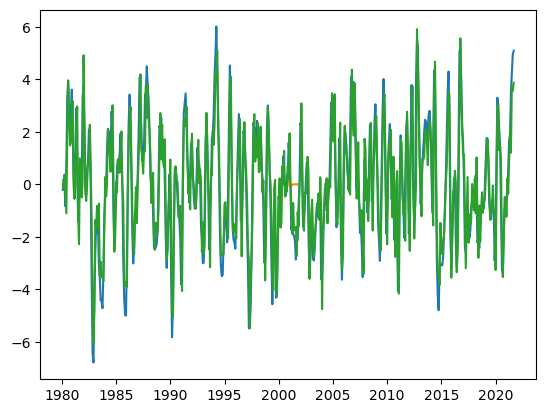

In [27]:
pred = arma_mod.fit().get_prediction(start=250, end=260,dynamic=True) 
plt.plot(y)
plt.plot(pred.predicted_mean )
plt.plot(arma_mod.fit().fittedvalues)
y,pred.predicted_mean

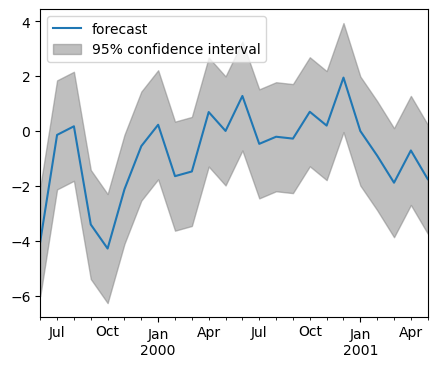

In [28]:
fig, ax = plt.subplots(figsize=(5, 4))
fig = plot_predict(arma_res, start="1999-06-30", end="2001-05-31", ax=ax)
legend = ax.legend(loc="upper left")

# statsmodelsで予測する

statsmodelsの時系列モデルを使った予測について説明します。ここでの方法は、状態空間モデルクラスにのみ適用されます：

sm.tsa.SARIMAX
sm.tsa.UnobservedComponents
sm.tsa.VARMAX
sm.tsa.DynamicFactor（ダイナミックファクター

In [29]:
macrodata = sm.datasets.macrodata.load_pandas().data
macrodata.index = pd.period_range('1959Q1', '2009Q3', freq='Q')

## 基本的な例

AR(1)モデルを使ってインフレ率を予測する方法を紹介します。予測する前に、系列を見てみましょう：

<AxesSubplot:>

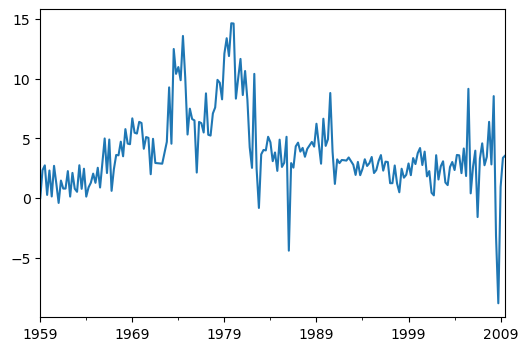

In [67]:
endog = macrodata['infl']
endog.plot(figsize=(6, 4))

In [68]:
endog

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## モデルの構築と推定

まず、予測に使用する計量経済学的モデルを定式化します。今回は、AR(1)モデルにstatsmodelsのSARIMAXクラスを使用します。

モデルを構築した後、そのパラメータを推定する必要があります。これは、fitメソッドを使って行います。summaryメソッドでは、結果を表として表示します。

In [31]:
# Construct the model
mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   infl   No. Observations:                  203
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -472.714
Date:                Wed, 21 Jun 2023   AIC                            951.427
Time:                        08:50:49   BIC                            961.367
Sample:                    03-31-1959   HQIC                           955.449
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3962      0.254      5.488      0.000       0.898       1.895
ar.L1          0.6441      0.039     16.482      0.000       0.568       0.721
sigma2         6.1519      0.397     15.487      0.0

## 予測

サンプル外予測は、resultsオブジェクトのforecastまたはget_forecastメソッドを使用して作成します。

forecastメソッドは、ポイント予測のみを行います。

In [32]:
# The default is to get a one-step-ahead forecast:
print(res.forecast())

2009Q4    3.68921
Freq: Q-DEC, dtype: float64


get_forecastメソッドはより一般的であり、信頼区間を構築することも可能です。

In [33]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

infl       mean   mean_se  mean_ci_lower  mean_ci_upper
2009Q4  3.68921  2.480302      -0.390523       7.768943


デフォルトの信頼度は95%ですが、これはalphaパラメータを設定することで制御できます。
. 上記の例では、alpha=0.10を用いて信頼度を90%に指定しています。

予測回数の指定
forecastとget_forecastの両関数は、何回予測したいかを示す1つの引数を受け取ります。この引数の1つのオプションは、常に、希望する先のステップ数を記述する整数を提供することです。

In [34]:
print(res.forecast(steps=2))

2009Q4    3.689210
2010Q1    3.772434
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [35]:
fcast_res2 = res.get_forecast(steps=2)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res2.summary_frame())

infl        mean   mean_se  mean_ci_lower  mean_ci_upper
2009Q4  3.689210  2.480302      -1.172092       8.550512
2010Q1  3.772434  2.950274      -2.009996       9.554865


しかし、データに頻度が定義されたPandasインデックスが含まれている場合（詳しくは末尾の「インデックス」の項を参照）、代わりに、予測を作成する日付を指定することができます：

In [36]:
print(res.forecast('2010Q2'))

2009Q4    3.689210
2010Q1    3.772434
2010Q2    3.826039
Freq: Q-DEC, Name: predicted_mean, dtype: float64


In [37]:
fcast_res3 = res.get_forecast('2010Q2')
print(fcast_res3.summary_frame())

infl        mean   mean_se  mean_ci_lower  mean_ci_upper
2009Q4  3.689210  2.480302      -1.172092       8.550512
2010Q1  3.772434  2.950274      -2.009996       9.554865
2010Q2  3.826039  3.124571      -2.298008       9.950087


## データ、予測、信頼区間をプロットする

データ、予測、信頼区間をプロットすると便利なことがよくあります。これには多くの方法がありますが、以下にその一例を示します。

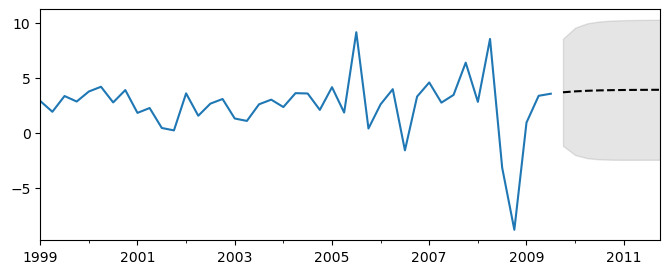

In [38]:
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
endog.loc['1999':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast('2011Q4').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

### forecastに期待することについての注意点

上述の予測は、ほとんど直線なので、あまり印象が良くないかもしれません。これは、これが非常にシンプルな一変量予測モデルだからです。しかし、このような単純な予測モデルは、非常に有効であることを覚えておいてください。

## forecast vs prediction

結果オブジェクトには、サンプル内適合値とサンプル外予測の両方を行う2つのメソッドが含まれています。それらはpredictとget_predictionです。predictメソッドはポイント予測（forecastと同様）を返すだけですが、get_predictionメソッドは追加結果（get_forecastと同様）も返します。

一般的に、サンプル外予測に興味がある場合は、forecastとget_forecastメソッドの方が簡単です。

## クロスバリデーション

以下のプロセスを用いて再帰的にhステップ将来予測を行います。予測手法のクロスバリデーションを行います。

- 訓練サンプルでモデル・パラメータを適合させる。
- そのサンプルの最後からhステップ・アヘッド予測を作成する。
- 予測をテスト・データセットと比較し、エラー・レートを計算する。
- 次の観測を含むようにサンプルを拡張し、それを繰り返す。
- 経済学者は、これを「疑似サンプル外予測評価演習」または「時系列クロスバリデーション」と呼ぶことがあります。

### 例
上記のインフレ・データセットを使って、この種の非常に簡単な演習を行います。完全なデータセットには203の観測値があり、説明のために最初の80%をトレーニング・サンプルとして使い、一歩先の予測のみを検討することにします。

上記の手順の1回の反復は次のようになります：

In [39]:
# Step 1: fit model parameters w/ training sample
training_obs = int(len(endog) * 0.8)

training_endog = endog[:training_obs]
training_mod = sm.tsa.SARIMAX(
    training_endog, order=(1, 0, 0), trend='c')
training_res = training_mod.fit()

# Print the estimated parameters
print(training_res.params)

intercept    1.162076
ar.L1        0.724242
sigma2       5.051600
dtype: float64


In [59]:
# Step 2: produce one-step-ahead forecasts
fcast = training_res.forecast()
fcast

1999Q3    2.55262
Freq: Q-DEC, dtype: float64

In [62]:
# Step 3: compute root mean square forecasting error
true = endog.reindex(fcast.index)
true

1999Q3    3.35
Freq: Q-DEC, Name: infl, dtype: float64

In [40]:
error = true - fcast

# Print out the results
print(pd.concat([true.rename('true'),
                 fcast.rename('forecast'),
                 error.rename('error')], axis=1))

        true  forecast    error
1999Q3  3.35   2.55262  0.79738


別の観測結果を追加するには、appendまたはextend resultsメソッドを使用できます。どちらの方法でも同じ予測ができますが、利用できる他の結果に違いがあります：

appendは、より完全な方法です。それは常にすべてのトレーニングオブザベーションの結果を保存し、オプションで新しいオブザベーションを与えてモデルパラメータを再フィットすることができます（デフォルトはパラメータを再フィットしないことに注意してください）。

extendは、トレーニングサンプルが非常に大きい場合に有用な、より高速な方法です。これは新しいオブザベーションの結果のみを保存し、モデル・パラメータの再フィットはできません（つまり、前のサンプルで推定されたパラメータを使用する必要があります）。

appendメソッドを使用し、パラメータを再フィットする2回目の反復は次のようになります（appendのデフォルトはパラメータを再フィットしませんが、refit=True引数でそれを上書きしていることに再度注意してください）：

In [41]:
# Step 1: append a new observation to the sample and refit the parameters
append_res = training_res.append(endog[training_obs:training_obs + 1], refit=True)

# Print the re-estimated parameters
print(append_res.params)

intercept    1.171544
ar.L1        0.723152
sigma2       5.024580
dtype: float64


これらの推定されたパラメータは、私たちが最初に推定したものとわずかに異なっていることに注意してください。新しい結果オブジェクトであるappend_resを使えば、前の呼び出しよりさらに1つの観測から始まる予測を計算することができます：

In [42]:
# Step 2: produce one-step-ahead forecasts
fcast = append_res.forecast()

# Step 3: compute root mean square forecasting error
true = endog.reindex(fcast.index)
error = true - fcast

# Print out the results
print(pd.concat([true.rename('true'),
                 fcast.rename('forecast'),
                 error.rename('error')], axis=1))

        true  forecast     error
1999Q4  2.85  3.594102 -0.744102


これを総合すると、次のように再帰的な予測評価演習を行うことができます：

In [70]:
# Setup forecasts
nforecasts = 3
forecasts = {}

# Get the number of initial training observations
nobs = len(endog)
n_init_training = int(nobs * 0.8)

# Create model for initial training sample, fit parameters
init_training_endog = endog.iloc[:n_init_training]
mod = sm.tsa.SARIMAX(training_endog, order=(1, 0, 0), trend='c')
res = mod.fit()

# Save initial forecast
forecasts[training_endog.index[-1]] = res.forecast(steps=nforecasts)

# Step through the rest of the sample
for t in range(n_init_training, nobs):
    # Update the results by appending the next observation
    updated_endog = endog.iloc[t:t+1]
    res = res.append(updated_endog, refit=False)
    
    # Save the new set of forecasts
    forecasts[updated_endog.index[0]] = res.forecast(steps=nforecasts)

# Combine all forecasts into a dataframe
forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:5, :5])

          1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
1999Q3  2.552620       NaN       NaN       NaN       NaN
1999Q4  3.010790  3.588286       NaN       NaN       NaN
2000Q1  3.342616  3.760863  3.226165       NaN       NaN
2000Q2       NaN  3.885850  3.498599  3.885225       NaN
2000Q3       NaN       NaN  3.695908  3.975918  4.196649


1999Q2から2009Q3までの各時点で行われた3つの予測のセットが出来上がりました。各予測値をその時点のendogの実測値から差し引くことで、予測誤差を算出することができます。

In [44]:
# Construct the forecast errors
forecast_errors = forecasts.apply(lambda column: endog - column).reindex(forecasts.index)

print(forecast_errors.iloc[:5, :5])

          1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
1999Q3  0.797380       NaN       NaN       NaN       NaN
1999Q4 -0.160790 -0.738286       NaN       NaN       NaN
2000Q1  0.417384 -0.000863  0.533835       NaN       NaN
2000Q2       NaN  0.304150  0.691401  0.304775       NaN
2000Q3       NaN       NaN -0.925908 -1.205918 -1.426649


予測を評価するために、二乗平均平方根誤差のような要約値を見たいと思うことがよくあります。ここでは、まず予測誤差を平らにして、水平軸ごとにインデックスを付け、各水平軸の二乗平均平方根誤差を計算することで、各水平軸の誤差を算出します。

In [45]:
# Reindex the forecasts by horizon rather than by date
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:3, :5])

           1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
horizon                                                  
1        0.797380 -0.738286  0.533835  0.304775 -1.426649
2       -0.160790 -0.000863  0.691401 -1.205918 -0.311464
3        0.417384  0.304150 -0.925908 -0.151602 -2.384952


In [46]:
# Compute the root mean square error
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    3.292700
2    3.421808
3    3.280012
dtype: float64


## extendの使い方

extendメソッドの代わりに、refit=Trueの引数でappendを使用したときと全く同じではないものの、同様の予測が得られることを確認することができます。これは、extendが新しい観測値に対してパラメータを再推定しないためです。

In [47]:
# Setup forecasts
nforecasts = 3
forecasts = {}

# Get the number of initial training observations
nobs = len(endog)
n_init_training = int(nobs * 0.8)

# Create model for initial training sample, fit parameters
init_training_endog = endog.iloc[:n_init_training]
mod = sm.tsa.SARIMAX(training_endog, order=(1, 0, 0), trend='c')
res = mod.fit()

# Save initial forecast
forecasts[training_endog.index[-1]] = res.forecast(steps=nforecasts)

# Step through the rest of the sample
for t in range(n_init_training, nobs):
    # Update the results by appending the next observation
    updated_endog = endog.iloc[t:t+1]
    res = res.extend(updated_endog)
    
    # Save the new set of forecasts
    forecasts[updated_endog.index[0]] = res.forecast(steps=nforecasts)

# Combine all forecasts into a dataframe
forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:5, :5])

          1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
1999Q3  2.552620       NaN       NaN       NaN       NaN
1999Q4  3.010790  3.588286       NaN       NaN       NaN
2000Q1  3.342616  3.760863  3.226165       NaN       NaN
2000Q2       NaN  3.885850  3.498599  3.885225       NaN
2000Q3       NaN       NaN  3.695908  3.975918  4.196649


In [48]:
# Construct the forecast errors
forecast_errors = forecasts.apply(lambda column: endog - column).reindex(forecasts.index)

print(forecast_errors.iloc[:5, :5])

          1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
1999Q3  0.797380       NaN       NaN       NaN       NaN
1999Q4 -0.160790 -0.738286       NaN       NaN       NaN
2000Q1  0.417384 -0.000863  0.533835       NaN       NaN
2000Q2       NaN  0.304150  0.691401  0.304775       NaN
2000Q3       NaN       NaN -0.925908 -1.205918 -1.426649


In [49]:
# Reindex the forecasts by horizon rather than by date
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:3, :5])

           1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
horizon                                                  
1        0.797380 -0.738286  0.533835  0.304775 -1.426649
2       -0.160790 -0.000863  0.691401 -1.205918 -0.311464
3        0.417384  0.304150 -0.925908 -0.151602 -2.384952


In [50]:
# Compute the root mean square error
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    3.292700
2    3.421808
3    3.280012
dtype: float64


パラメータを再推定しないことで、予測は若干悪くなります（二乗平均平方根誤差が各時点で高くなります）。しかし、たった200個のデータポイントでも、処理は速くなりました。上記のセルに%%timeitのセルマジックを使うと、extendを使った場合の実行時間は570ms、refit=Trueのappendを使った場合は1.7sとなりました（なお、refit=Falseのappendよりもextendの方が速いです）。

## インデックス

今回は、Pandasの日付インデックスとそれに関連する頻度を使用しています。このインデックスは、1959Q1 から 2009Q3 までの四半期ごとの頻度としてデータをマークしています。

In [51]:
print(endog.index)

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)


ほとんどの場合、もしあなたのデータが定義された頻度（四半期、月など）を持つ関連データ/時間インデックスを持っているなら、あなたのデータが適切なインデックスを持つPandasシリーズであることを確認することが最善です。以下はその3つの例です：

In [52]:
# Annual frequency, using a PeriodIndex
index = pd.period_range(start='2000', periods=4, freq='A')
endog1 = pd.Series([1, 2, 3, 4], index=index)
print(endog1.index)

PeriodIndex(['2000', '2001', '2002', '2003'], dtype='period[A-DEC]')


In [53]:
# Quarterly frequency, using a DatetimeIndex
index = pd.date_range(start='2000', periods=4, freq='QS')
endog2 = pd.Series([1, 2, 3, 4], index=index)
print(endog2.index)

DatetimeIndex(['2000-01-01', '2000-04-01', '2000-07-01', '2000-10-01'], dtype='datetime64[ns]', freq='QS-JAN')


In [54]:
# Monthly frequency, using a DatetimeIndex
index = pd.date_range(start='2000', periods=4, freq='M')
endog3 = pd.Series([1, 2, 3, 4], index=index)
print(endog3.index)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30'], dtype='datetime64[ns]', freq='M')


実際、データに関連する日付/時間インデックスがある場合、定義された周波数がなくても、それを使用することが最善です。このようなインデックスの例は次のとおりです - freq=Noneであることに注意してください：

In [55]:
index = pd.DatetimeIndex([
    '2000-01-01 10:08am', '2000-01-01 11:32am',
    '2000-01-01 5:32pm', '2000-01-02 6:15am'])
endog4 = pd.Series([0.2, 0.5, -0.1, 0.1], index=index)
print(endog4.index)

DatetimeIndex(['2000-01-01 10:08:00', '2000-01-01 11:32:00',
               '2000-01-01 17:32:00', '2000-01-02 06:15:00'],
              dtype='datetime64[ns]', freq=None)


このデータをstatsmodelsのモデルクラスに渡すことはできますが、頻度データが見つからなかったという以下の警告が表示されます：

In [56]:
mod = sm.tsa.SARIMAX(endog4)
res = mod.fit()

C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


これはどういうことかというと、予測ステップを日付で指定することができず、forecastメソッドやget_forecastメソッドの出力には関連する日付がないのです。理由は、与えられた頻度がなければ、各予測がどのような日付に割り当てられるべきかを決定する方法がないからです。上の例では、インデックスの日時スタンプにパターンがないので、次の日時を決める方法がありません（2000-01-02の午前中がいいのか、午後がいいのか、それとも2000-01-03まで待てないのか）。

例えば、一歩先まで予測する場合：

In [57]:
res.forecast(1)

C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4    0.011866
dtype: float64

新しい予報に関連するインデックスは4で、与えられたデータに整数のインデックスがあれば、それが次の値になるからです。インデックスが日付/時刻インデックスでないことを知らせる警告が表示されます。

もし日付を使って予測のステップを指定しようとすると、次のような例外が発生します：

KeyError: '`end` 引数は、データのインデックスに関連する場所に一致させることができませんでした。

In [58]:
# Here we'll catch the exception to prevent printing too much of
# the exception trace output in this notebook
try:
    res.forecast('2000-01-03')
except KeyError as e:
    print(e)

'The `end` argument could not be matched to a location related to the index of the data.'


最終的には、関連する日付/時間の頻度を持たないデータ、あるいはNumpy配列のようなインデックスを全く持たないデータを使用することに何の問題もありません。しかし、もし関連する頻度を持つPandasシリーズを使うことができれば、予測を指定するためのオプションが増え、より有用なインデックスを持つ結果が返ってくるでしょう。